In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import pydotplus as pdp
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
# Question 1

# 1-a
df = pd.read_csv('Vehicle.csv')
display(df)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

In [3]:
# 1-b
# find the number of null values and missing values in each column
for col in df.columns:
    if df[col].dtype == 'int64':
        x=pd.to_numeric(df[col], errors='coerce')
        idx = x.isna()
        seen = set()
        uniq = [x for x in df[idx][col] if x not in seen and not seen.add(x)]
        for j in df[idx][col]:
            df[col] = df[col].replace({j : np.NaN})
        
df.isna().sum()

COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE_CIRCULARITY         0
RADIUS_RATIO                 0
PR.AXIS_ASPECT_RATIO         0
MAX.LENGTH_ASPECT_RATIO      0
SCATTER_RATIO                0
ELONGATEDNESS                0
PR.AXIS_RECTANGULARITY       0
MAX.LENGTH_RECTANGULARITY    0
SCALED_VARIANCE_MAJOR        0
SCALED_VARIANCE_MINOR        0
SCALED_RADIUS_OF_GYRATION    0
SKEWNESS_ABOUT_MAJOR         0
SKEWNESS_ABOUT_MINOR         0
KURTOSIS_ABOUT_MAJOR         0
KURTOSIS_ABOUT_MINOR         0
HOLLOWS_RATIO                0
Class                        0
dtype: int64

In [4]:
# removing outlier records from dataset using z-score method
correct_record = []
df_zscore = df.copy()
for col in df_zscore.columns:
    if df[col].dtype == 'int64':
        df_zscore['_z'] = stats.zscore(df_zscore[col])
        qu = '_z' + ' <= 3 & ' + '_z' + ' >= -3'
        Without_Outliers = df_zscore.query(qu)
        df_zscore =  Without_Outliers.copy()
    
df_zscore.drop(['_z'], axis=1, inplace=True)
print('Outliers record number using z_score \t', df.shape[0] - df_zscore.shape[0])
display(df_zscore)

Outliers record number using z_score 	 27


,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [5]:
# encoding categorical features
display(df_zscore['Class'].value_counts())

saab    211
opel    211
bus     205
van     192
Name: Class, dtype: int64

In [6]:
df_zscore['Class'] = df_zscore['Class'].astype('category')
df_zscore['Class'] = df_zscore['Class'].cat.codes
display(df_zscore.head())

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,0


In [7]:
display(df_zscore['Class'].value_counts())

1    211
2    211
0    205
3    192
Name: Class, dtype: int64

<AxesSubplot:>

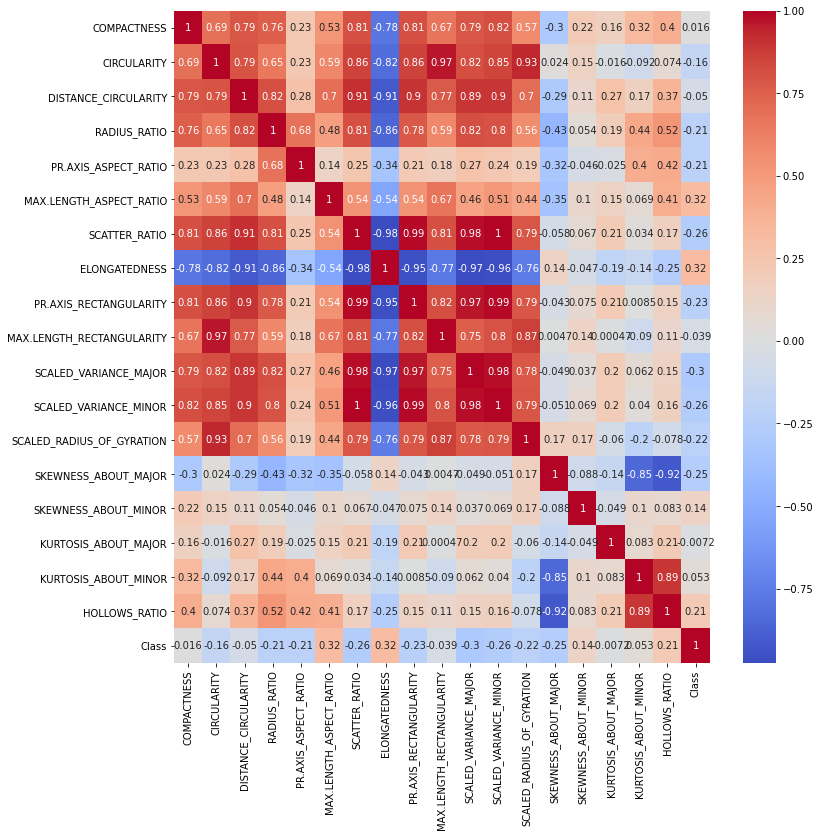

In [8]:
# 1-c
fig, axs = plt.subplots(1, 1, figsize=(12,12))
sns.heatmap(df_zscore.corr(), annot = True, fmt='.2g',cmap= 'coolwarm', ax=axs)

In [9]:
# 1-d
y = df_zscore[['Class']]
x = df_zscore.drop(['Class'], axis=1)

In [10]:
# 1-e
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [11]:
display(y_train['Class'].value_counts())
s = y_train['Class'].value_counts().sum()
print( '===========> train <===========' )
print( 'Distribution Of saab :' , round(y_train['Class'].value_counts()[2] * 100 / s, 2), '%')
print( 'Distribution Of bus  :' , round(y_train['Class'].value_counts()[0]  * 100 / s, 2), '%')
print( 'Distribution Of van  :' , round(y_train['Class'].value_counts()[3]  * 100 / s, 2), '%')
print( 'Distribution Of opel :' , round(y_train['Class'].value_counts()[1] * 100 / s, 2), '%')


0    174
2    170
1    164
3    147
Name: Class, dtype: int64

===========> train <===========
Distribution Of saab : 25.95 %
Distribution Of bus  : 26.56 %
Distribution Of van  : 22.44 %
Distribution Of opel : 25.04 %


In [12]:
display(y_test['Class'].value_counts())
s = y_test['Class'].value_counts().sum()
print( '===========> test <===========' )
print( 'Distribution Of saab :' , round(y_test['Class'].value_counts()[2] * 100 / s, 2), '%')
print( 'Distribution Of bus  :' , round(y_test['Class'].value_counts()[0]  * 100 / s, 2), '%')
print( 'Distribution Of van  :' , round(y_test['Class'].value_counts()[3]  * 100 / s, 2), '%')
print( 'Distribution Of opel :' , round(y_test['Class'].value_counts()[1] * 100 / s, 2), '%')


1    47
3    45
2    41
0    31
Name: Class, dtype: int64

===========> test <===========
Distribution Of saab : 25.0 %
Distribution Of bus  : 18.9 %
Distribution Of van  : 27.44 %
Distribution Of opel : 28.66 %


[Text(465.0, 733.86, 'X[10] <= 180.5\nentropy = 1.997\nsamples = 655\nvalue = [174, 164, 170, 147]'),
 Text(279.0, 570.78, 'X[5] <= 8.5\nentropy = 1.835\nsamples = 347\nvalue = [104, 46, 50, 147]'),
 Text(186.0, 407.70000000000005, 'X[11] <= 305.5\nentropy = 1.912\nsamples = 267\nvalue = [104, 44, 48, 71]'),
 Text(93.0, 244.62, 'entropy = 1.478\nsamples = 121\nvalue = [1, 26, 26, 68]'),
 Text(279.0, 244.62, 'X[2] <= 76.5\nentropy = 1.254\nsamples = 146\nvalue = [103, 18, 22, 3]'),
 Text(186.0, 81.54000000000008, 'entropy = 0.864\nsamples = 123\nvalue = [102, 8, 12, 1]'),
 Text(372.0, 81.54000000000008, 'entropy = 1.548\nsamples = 23\nvalue = [1, 10, 10, 2]'),
 Text(372.0, 407.70000000000005, 'entropy = 0.336\nsamples = 80\nvalue = [0, 2, 2, 76]'),
 Text(651.0, 570.78, 'X[5] <= 7.5\nentropy = 1.546\nsamples = 308\nvalue = [70, 118, 120, 0]'),
 Text(558.0, 407.70000000000005, 'X[7] <= 37.5\nentropy = 0.935\nsamples = 87\nvalue = [69, 7, 11, 0]'),
 Text(465.0, 244.62, 'entropy = 0.0\nsamp

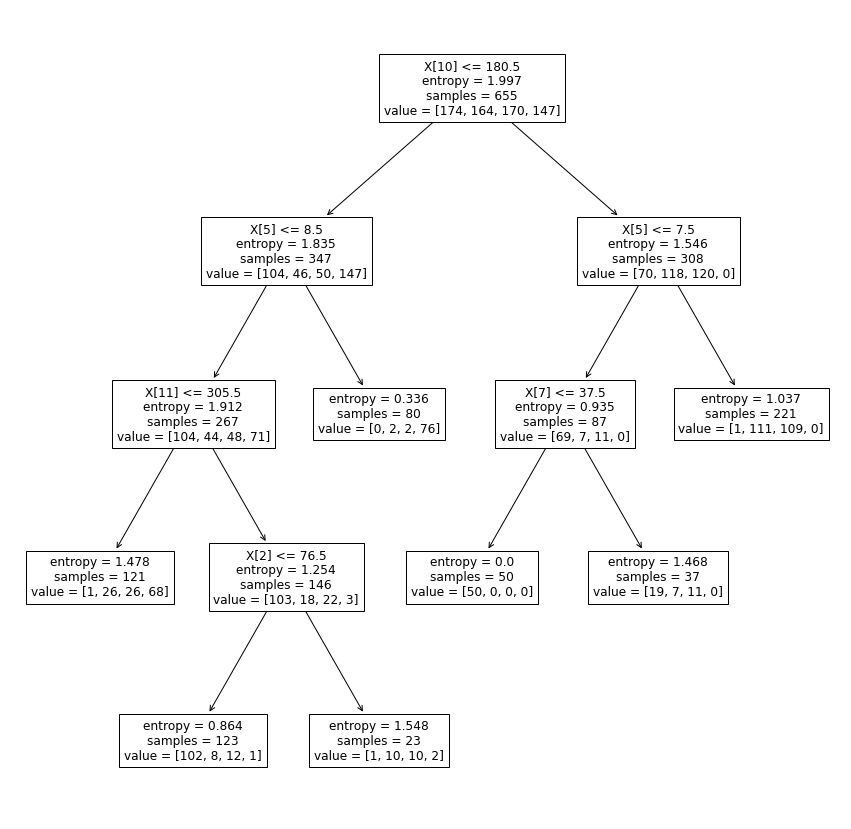

In [13]:
# 1-f
cart01 = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 7).fit(x_train, y_train)

fig, axs = plt.subplots(1, 1, figsize=(15,15))
tree.plot_tree(cart01, ax=axs)

In [14]:
# 1-g
score = cart01.score(x_test, y_test)
display(score)

0.6463414634146342

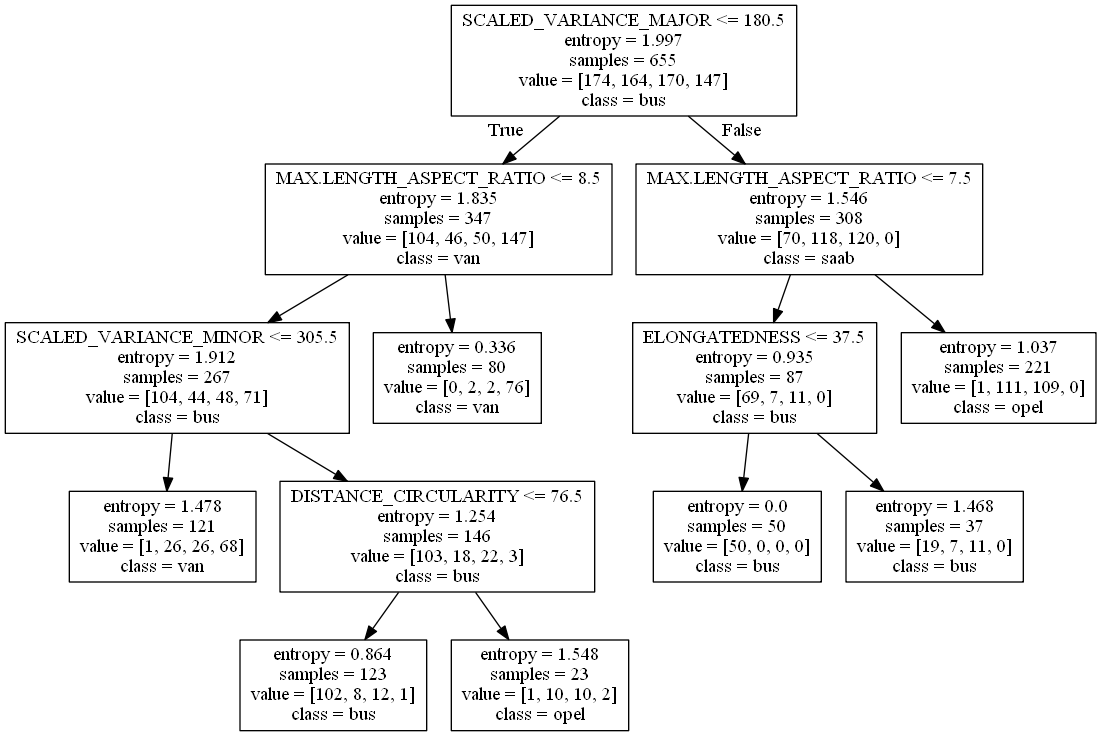

In [15]:
# 1-i
#y_names = cart01.classes_
y_names = ["bus", "opel", "saab", "van"]
x_names = [
           "COMPACTNESS", "CIRCULARITY", "DISTANCE_CIRCULARITY", "RADIUS_RATIO", "PR.AXIS_ASPECT_RATIO", 
           "MAX.LENGTH_ASPECT_RATIO", "SCATTER_RATIO", "ELONGATEDNESS", "PR.AXIS_RECTANGULARITY", 
           "MAX.LENGTH_RECTANGULARITY", "SCALED_VARIANCE_MAJOR", "SCALED_VARIANCE_MINOR", "SCALED_RADIUS_OF_GYRATION",
           "SKEWNESS_ABOUT_MAJOR", "SKEWNESS_ABOUT_MINOR", "KURTOSIS_ABOUT_MAJOR", "KURTOSIS_ABOUT_MINOR", "HOLLOWS_RATIO"
          ]
export_graphviz(cart01, out_file = "Decision_Tree.dot", class_names = y_names, feature_names = x_names)

os.environ['PATH'] = os.environ['PATH']+ ';' + os.environ['CONDA_PREFIX']+ r'\Library\bin\graphviz'
s = pdp.graph_from_dot_file("Decision_Tree.dot")


Image(s.create_png())